In [1]:
pip install ucimlrepo

In [2]:
#First two steps are to bring in the data from the referenced website
from ucimlrepo import fetch_ucirepo

national_health_and_nutrition_health_survey_2013_2014_nhanes_age_prediction_subset = fetch_ucirepo(id=887)

X = national_health_and_nutrition_health_survey_2013_2014_nhanes_age_prediction_subset.data.features
y = national_health_and_nutrition_health_survey_2013_2014_nhanes_age_prediction_subset.data.targets

print(national_health_and_nutrition_health_survey_2013_2014_nhanes_age_prediction_subset.metadata)

print(national_health_and_nutrition_health_survey_2013_2014_nhanes_age_prediction_subset.variables)

{'uci_id': 887, 'name': 'National Health and Nutrition Health Survey 2013-2014 (NHANES) Age Prediction Subset', 'repository_url': 'https://archive.ics.uci.edu/dataset/887/national+health+and+nutrition+health+survey+2013-2014+(nhanes)+age+prediction+subset', 'data_url': 'https://archive.ics.uci.edu/static/public/887/data.csv', 'abstract': "The National Health and Nutrition Examination Survey (NHANES), administered by the Centers for Disease Control and Prevention (CDC), collects extensive health and nutritional information from a diverse U.S. population. Though expansive, the dataset is often too broad for specific analytical purposes. In this sub-dataset, we narrow our focus to predicting respondents' age by extracting a subset of features from the larger NHANES dataset. These selected features include physiological measurements, lifestyle choices, and biochemical markers, which were hypothesized to have strong correlations with age.", 'area': 'Health and Medicine', 'tasks': ['Classifi

In [3]:
import pandas as pd
import numpy as np

In [25]:
#Create a dataframe with Features and Targets
national = national_health_and_nutrition_health_survey_2013_2014_nhanes_age_prediction_subset

In [26]:
df = pd.DataFrame(national.data.features)

In [27]:
df = df.assign(age_group=national.data.targets)

In [28]:
df = df.assign(RIDAGEYR=national.data.targets)

In [29]:
#Index the insulin levels to create a new column with assigned labels based off the value in the insulin column
df['Category'] = pd.cut(df['LBXIN'],
                        bins=[0, 10, 15, 30, 110],
                        labels=['Low', 'Medium', 'High', 'Very High'],
                        right=False,
                        include_lowest=True)

In [30]:
df.head()


,RIAGENDR,PAQ605,BMXBMI,LBXGLU,DIQ010,LBXGLT,LBXIN,age_group,RIDAGEYR,Category
0,2.0,2.0,35.7,110.0,2.0,150.0,14.91,Adult,Adult,Medium
1,2.0,2.0,20.3,89.0,2.0,80.0,3.85,Adult,Adult,Low
2,1.0,2.0,23.2,89.0,2.0,68.0,6.14,Adult,Adult,Low
3,1.0,2.0,28.9,104.0,2.0,84.0,16.15,Adult,Adult,High
4,2.0,1.0,35.9,103.0,2.0,81.0,10.92,Adult,Adult,Medium


In [31]:
#Using Label encoding to change Adult and Senior into 1 and 2 for the decision tree
d = {'Adult': 1, 'Senior': 2}
df['age_group'] = df['age_group'].map(d)
df['RIDAGEYR'] = df['RIDAGEYR'].map(d)
print(df)

      RIAGENDR  PAQ605  BMXBMI  LBXGLU  DIQ010  LBXGLT  LBXIN  age_group  \
0          2.0     2.0    35.7   110.0     2.0   150.0  14.91          1   
1          2.0     2.0    20.3    89.0     2.0    80.0   3.85          1   
2          1.0     2.0    23.2    89.0     2.0    68.0   6.14          1   
3          1.0     2.0    28.9   104.0     2.0    84.0  16.15          1   
4          2.0     1.0    35.9   103.0     2.0    81.0  10.92          1   
...        ...     ...     ...     ...     ...     ...    ...        ...   
2273       2.0     2.0    33.5   100.0     2.0    73.0   6.53          1   
2274       1.0     2.0    30.0    93.0     2.0   208.0  13.02          1   
2275       1.0     2.0    23.7   103.0     2.0   124.0  21.41          1   
2276       2.0     2.0    27.4    90.0     2.0   108.0   4.99          1   
2277       1.0     2.0    24.5   108.0     2.0   108.0   3.76          1   

      RIDAGEYR Category  
0            1   Medium  
1            1      Low  
2        

In [32]:
import pandas
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

In [33]:
#To give more familar names to the column headers
df.rename(columns={'RIAGENDR': 'Gender', 'PAQ605': 'Exercise', 'BMXBMI': 'BMI', 'LBXGLU': 'Glucose', 'DIQ010': 'Diabetic', 'LBXGLT': 'Oral_Glucose', 'RIDAGEYR': 'Age', 'LBXIN': 'Insulin', 'Category': 'Insulin_Category'}, inplace=True)

In [34]:
print(df)

      Gender  Exercise   BMI  Glucose  Diabetic  Oral_Glucose  Insulin  \
0        2.0       2.0  35.7    110.0       2.0         150.0    14.91   
1        2.0       2.0  20.3     89.0       2.0          80.0     3.85   
2        1.0       2.0  23.2     89.0       2.0          68.0     6.14   
3        1.0       2.0  28.9    104.0       2.0          84.0    16.15   
4        2.0       1.0  35.9    103.0       2.0          81.0    10.92   
...      ...       ...   ...      ...       ...           ...      ...   
2273     2.0       2.0  33.5    100.0       2.0          73.0     6.53   
2274     1.0       2.0  30.0     93.0       2.0         208.0    13.02   
2275     1.0       2.0  23.7    103.0       2.0         124.0    21.41   
2276     2.0       2.0  27.4     90.0       2.0         108.0     4.99   
2277     1.0       2.0  24.5    108.0       2.0         108.0     3.76   

      age_group  Age Insulin_Category  
0             1    1           Medium  
1             1    1           

In [35]:
#Assign the features for the decision tree
features = ['Gender', 'Exercise', 'BMI', 'Glucose', 'Diabetic', 'Oral_Glucose', 'Age', 'Insulin']

In [36]:
#create the testing and training sets
X = df[features]
Y = df['Insulin_Category']

[Text(0.3333333333333333, 0.875, 'Insulin <= 10.0\ngini = 0.613\nsamples = 2278\nvalue = [415, 1258, 488, 117]'),
 Text(0.16666666666666666, 0.625, 'gini = 0.0\nsamples = 1258\nvalue = [0, 1258, 0, 0]'),
 Text(0.25, 0.75, 'True  '),
 Text(0.5, 0.625, 'Insulin <= 14.99\ngini = 0.592\nsamples = 1020\nvalue = [415, 0, 488, 117]'),
 Text(0.41666666666666663, 0.75, '  False'),
 Text(0.3333333333333333, 0.375, 'gini = 0.0\nsamples = 488\nvalue = [0, 0, 488, 0]'),
 Text(0.6666666666666666, 0.375, 'Insulin <= 29.94\ngini = 0.343\nsamples = 532\nvalue = [415, 0, 0, 117]'),
 Text(0.5, 0.125, 'gini = 0.0\nsamples = 415\nvalue = [415, 0, 0, 0]'),
 Text(0.8333333333333334, 0.125, 'gini = 0.0\nsamples = 117\nvalue = [0, 0, 0, 117]')]

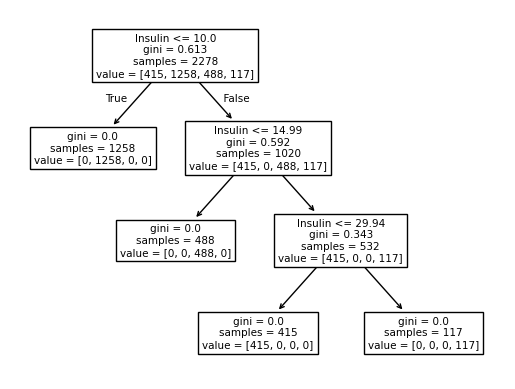

In [37]:
dtree = DecisionTreeClassifier()
dtree = dtree.fit(X, Y)

tree.plot_tree(dtree, feature_names=features)